In [ ]:
//@version=5
indicator("6CBP Pattern Detector (Bearish & Bullish)", overlay=true, max_labels_count=500, max_lines_count=500, max_boxes_count=500)

// ────────────────────────────
// Candle Data
// ────────────────────────────
o = open
h = high
l = low
c = close

// ────────────────────────────
// Helper Function: Midpoint of Candle Body
// ────────────────────────────
get_mid(_o, _c) => (_o + _c) / 2

// ────────────────────────────
// 🟥 Bearish 6CBP Pattern Logic
// ────────────────────────────
bear_bull1 = c[5] > o[5]
bear_bull2 = c[4] > o[4] and c[4] > c[5]
bear_bear3 = c[3] < o[3] and c[3] < o[4]
bear_bull4 = c[2] > c[3] and c[2] < o[3]
bear_bear5 = c[1] < o[2] and c[1] < c[3] and c[1] < o[4]
bear_bear6 = c < o and c < o[5] and c < c[1]

bearish_6CBP = bear_bull1 and bear_bull2 and bear_bear3 and bear_bull4 and bear_bear5 and bear_bear6

// 4th candle coordinates (bearish reference)
o4_bear = o[2]
c4_bear = c[2]
h4_bear = h[2]
l4_bear = l[2]
mid4_bear = get_mid(o4_bear, c4_bear)

// ────────────────────────────
// 🟩 Bullish 6CBP Pattern Logic (Inverse)
// ────────────────────────────
bull_bear1 = c[5] < o[5]
bull_bear2 = c[4] < o[4] and c[4] < c[5]
bull_bull3 = c[3] > o[3] and c[3] > o[4]
bull_bear4 = c[2] < c[3] and c[2] > o[3]
bull_bull5 = c[1] > o[2] and c[1] > c[3] and c[1] > o[4]
bull_bull6 = c > o and c > o[5] and c > c[1]

bullish_6CBP = bull_bear1 and bull_bear2 and bull_bull3 and bull_bear4 and bull_bull5 and bull_bull6

// 4th candle coordinates (bullish reference)
o4_bull = o[2]
c4_bull = c[2]
h4_bull = h[2]
l4_bull = l[2]
mid4_bull = get_mid(o4_bull, c4_bull)

// ────────────────────────────
// 🟥 Draw Bearish Signal Elements
// ────────────────────────────
if bearish_6CBP
    // Tiny diamond on top wick of 4th candle
    label.new( bar_index[2], h4_bear,text="6CBP↓",  style=label.style_diamond,color=color.new(color.red, 0), textcolor=color.new(#000000, 0),  size=size.tiny)

    // Rectangle for 4th candle’s body, extended 10 bars right
    box.new(  left=bar_index[2], right=bar_index[2] + 10,  top=math.max(o4_bear, c4_bear), bottom=math.min(o4_bear, c4_bear),bgcolor=color.new(color.red, 85),border_color=color.new(color.red, 0))

    // Midline for reference
    line.new( bar_index[2], mid4_bear, bar_index[2] + 10, mid4_bear,  color=color.new(color.red, 0), width=1 )

// ────────────────────────────
// 🟩 Draw Bullish Signal Elements
// ────────────────────────────
if bullish_6CBP
    // Tiny diamond on bottom wick of 4th candle
    label.new(bar_index[2], l4_bull, text="6CBP↑",style=label.style_diamond,color=color.new(color.lime, 0),textcolor=color.new(#000000, 0), size=size.tiny )

    // Rectangle for 4th candle’s body, extended 10 bars right
    box.new(left=bar_index[2], right=bar_index[2] + 10, top=math.max(o4_bull, c4_bull),bottom=math.min(o4_bull, c4_bull), bgcolor=color.new(color.lime, 85),    border_color=color.new(color.lime, 0)  )

    // Midline for reference
    line.new(  bar_index[2],  mid4_bull,  bar_index[2] + 10,  mid4_bull, color=color.new(color.lime, 0), width=1  )


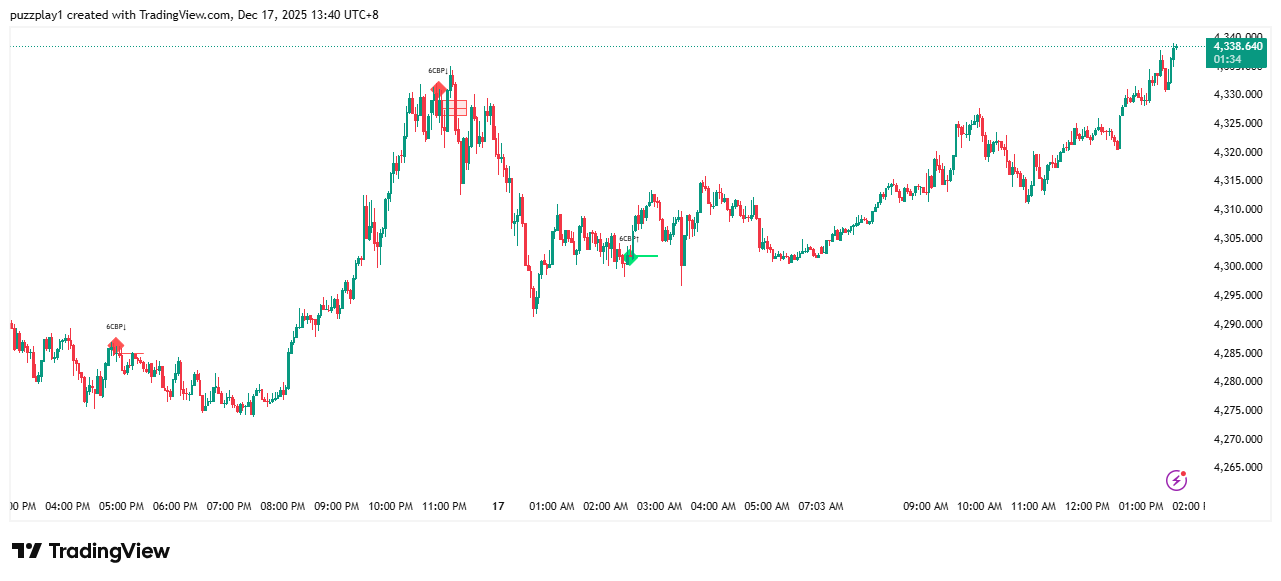